# Dog and Cat Classifier with CNN

In the previous model, high accuracy wasn't acheived due to overfitting; here we will solve that by using data augmentation to zoom, shear, shift etc. images such as to get a higher accuracy score than the previous (Simple) model.

## Import libraries and define paths

In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tfl
from tensorflow import keras
import os

In [25]:
path_test = "/content/drive/MyDrive/cats_and_dogs_small/test"
path_train = "/content/drive/MyDrive/cats_and_dogs_small/train"
path_valid = "/content/drive/MyDrive/cats_and_dogs_small/validation"

In [26]:
from keras.preprocessing.image import ImageDataGenerator

## Define the image generators
<p>Here in order to prevent overfitting, we will augment the data by applying rescaling, rotation, horizontal and vertical shifts, shearing, zooming and horizontal flipping.</p>

<p>Due to the fact that we cannot control the testing data, we will merely rescale it to standardise the dimensions.</p>

In [27]:
train_datagen = ImageDataGenerator(
    rescale = 1/255,
    rotation_range = 40,
    width_shift_range = 0.2,
    height_shift_range = 0.2,
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True
)

test_datagen = ImageDataGenerator(rescale = 1/255)

Now we will use the generators to get our values.

In [28]:
train_generator = train_datagen.flow_from_directory(
    path_train,
    target_size = (150, 150),
    batch_size = 20,
    class_mode = 'binary'
)

valid_generator = test_datagen.flow_from_directory(
    path_valid,
    target_size = (150, 150),
    batch_size = 20,
    class_mode = 'binary'
)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


## Create the Model

Here in order to further remove overfitting, a dropdown layer with parameter 0.5 is added so that half (50%) of the data from flatten layer would be dropped causing a subset of data to be delivered thus making the model more succesptible to sparse training data i.e. model would be trained on a small feature set eg: eyes of a cat, legs of a dog etc. instead of entire images of cats and dogs thus removing scope of overfitting and thus increasing accuracy in the result.

In [29]:
model = keras.models.Sequential()

model.add(keras.layers.Conv2D(32, (3, 3), activation = 'relu', input_shape = [150, 150, 3])),
model.add(keras.layers.MaxPooling2D((2, 2)))

model.add(keras.layers.Conv2D(64, (3, 3), activation = 'relu'))
model.add(keras.layers.MaxPooling2D((2, 2)))

model.add(keras.layers.Conv2D(128, (3, 3), activation = 'relu'))
model.add(keras.layers.MaxPooling2D((2, 2)))

model.add(keras.layers.Conv2D(128, (3, 3), activation = 'relu'))
model.add(keras.layers.MaxPooling2D((2, 2)))

model.add(keras.layers.Flatten())
model.add(keras.layers.Dropout(0.5))
model.add(keras.layers.Dense(512, activation = 'relu'))
model.add(keras.layers.Dense(1, activation = 'sigmoid'))

In [30]:
print(model.summary())

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 15, 15, 128)      

## Visualise the Model

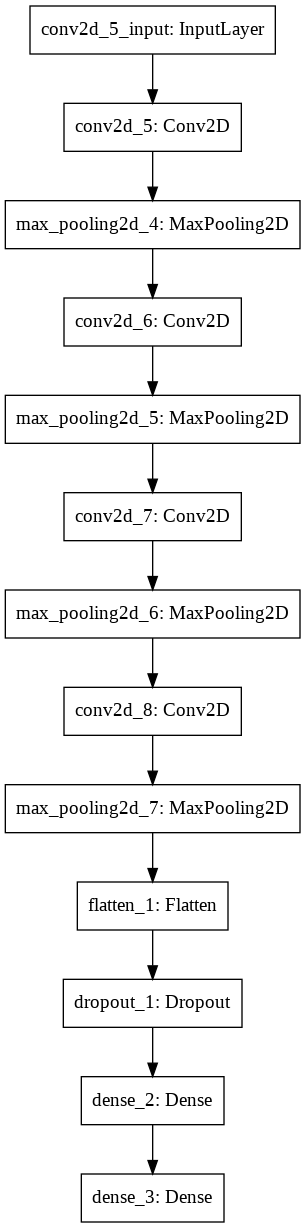

In [31]:
import pydot
import graphviz
keras.utils.plot_model(model)

## Compile the Model

In [32]:
model.compile(loss = 'binary_crossentropy', optimizer = keras.optimizers.RMSprop(lr = 1e-4), metrics = ['accuracy'])

## Train the Model

In [33]:
checkpoints_cb = keras.callbacks.ModelCheckpoint('Cat_Dog_Classifier_v2.h5', save_best_only = True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience = 10, restore_best_weights = True)

In [34]:
history = model.fit(
    train_generator,
    steps_per_epoch = 100,
    epochs = 2000000, # an impossibly large value to facilitate callbacks
    validation_data = valid_generator,
    validation_steps = 50,
    callbacks = [checkpoints_cb, early_stopping_cb]
)

Epoch 1/2000000
100/100 [==============================] - 120s 1s/step - loss: 0.6966 - accuracy: 0.5196 - val_loss: 0.6886 - val_accuracy: 0.5830
Epoch 2/2000000
100/100 [==============================] - 119s 1s/step - loss: 0.6905 - accuracy: 0.5364 - val_loss: 0.6934 - val_accuracy: 0.5240
Epoch 3/2000000
100/100 [==============================] - 119s 1s/step - loss: 0.6808 - accuracy: 0.5592 - val_loss: 0.6530 - val_accuracy: 0.6160
Epoch 4/2000000
100/100 [==============================] - 120s 1s/step - loss: 0.6677 - accuracy: 0.6008 - val_loss: 0.6450 - val_accuracy: 0.6210
Epoch 5/2000000
100/100 [==============================] - 119s 1s/step - loss: 0.6587 - accuracy: 0.6122 - val_loss: 0.6388 - val_accuracy: 0.6260
Epoch 6/2000000
100/100 [==============================] - 118s 1s/step - loss: 0.6483 - accuracy: 0.6230 - val_loss: 0.6119 - val_accuracy: 0.6630
Epoch 7/2000000
100/100 [==============================] - 118s 1s/step - loss: 0.6309 - accuracy: 0.6553 - val_

## Plot the training history

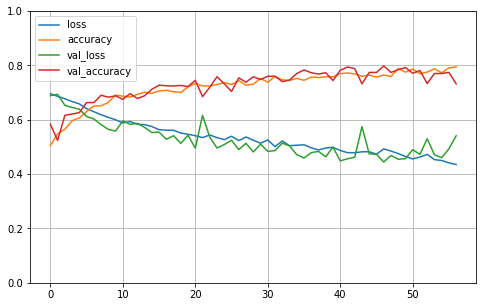

In [36]:
pd.DataFrame(history.history).plot(figsize = (8, 5))
plt.grid()
plt.gca().set_ylim(0, 1)
plt.show()

Note here how validation and training losses are nearly on the same level indicating that there is no overfitting. We may increase accuracy by early stopping on accuracy instead of val_loss, this model itself took two hours to train and thus that model will not be implemented on this notebook.

## Clear the Backend/RAM

In [37]:
keras.backend.clear_session()
del model